# Music Generator using GANs


In [1]:
# Import necessary libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt


# Load the MNIST dataset

In [2]:
# Load the MNIST dataset
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()



# Reshape and normalize the data

In [3]:
# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255

# Print the shape of the training and testing data

In [4]:
# Print the shape of the training and testing data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


# Define the discriminator model

In [5]:
# Define the discriminator model
def define_discriminator():
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Define the generator model

In [6]:
# Define the generator model
def define_generator():
    model = keras.Sequential()
    model.add(layers.Dense(7*7*128, input_dim=100, activation='relu'))
    model.add(layers.Reshape((7, 7, 128)))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.UpSampling2D())

    model.add(layers.Conv2D(64, (5, 5), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.UpSampling2D())

    model.add(layers.Conv2D(1, (5, 5), padding='same'))
    model.add(layers.Activation('tanh'))
    return model

# Define the GAN model

In [7]:
# Define the GAN model
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Define the models

In [8]:
# Define the models
discriminator = define_discriminator()
generator = define_generator()
gan = define_gan(generator, discriminator)

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the GAN

In [9]:

# Train the GAN
batch_size = 32
for epoch in range(100):
    for i in range(len(x_train) // batch_size):
        # Sample a batch of real data
        real_data = x_train[np.random.choice(x_train.shape[0], batch_size, replace=False)]

In [10]:
# Sample a batch of noise
noise = np.random.normal(0, 1, (batch_size, 100))

In [11]:
# Train the discriminator
discriminator.trainable = True
d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
d_loss_fake = discriminator.train_on_batch(generator.predict(noise), np.zeros((batch_size, 1)))
d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [12]:
# Train the generator
discriminator.trainable = False
g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

print(f'Epoch {epoch+1}, D loss: {d_loss}, G loss: {g_loss}')

Epoch 100, D loss: 0.6939439177513123, G loss: [array(0.7077147, dtype=float32), array(0.7077147, dtype=float32)]


In [13]:
# Generate some new handwritten digits
noise = np.random.normal(0, 1, (25, 100))
generated_digits = generator.predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


# Plot the generated digits

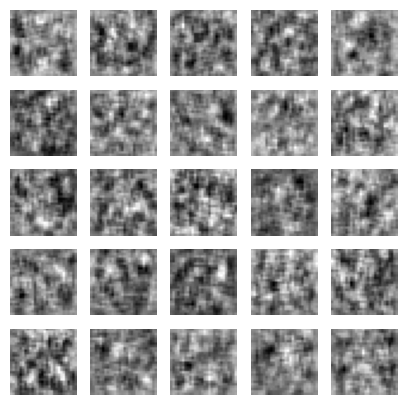

In [14]:
# Plot the generated digits
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(generated_digits[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()